In [121]:
from pyspark.sql import SparkSession
import numpy as np
import scipy.linalg
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
spark = SparkSession.builder.config("some_config", "some_value").master("local[*]").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/17 12:03:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
genes = spark.read.parquet("../../data/genes-index/")
genes=genes.toPandas()

In [4]:
genes

,biotype,chr,description,end,exons,fwdstrand,gene_id,gene_name,start,tss
0,protein_coding,1,SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...,169894267,"[169870255,169870357,169873696,169873752,16984...",0,ENSG00000000457,SCYL3,169849631,169894267
1,protein_coding,1,chromosome 1 open reading frame 112 [Source:HG...,169854080,"[169849500,169849604,169795040,169795115,16980...",1,ENSG00000000460,C1orf112,169662007,169662007
2,protein_coding,1,"FGR proto-oncogene, Src family tyrosine kinase...",27635185,"[27612064,27613122,27613219,27613350,27614430,...",0,ENSG00000000938,FGR,27612064,27635185
3,protein_coding,1,complement factor H [Source:HGNC Symbol;Acc:HG...,196752476,"[196652043,196652175,196672978,196673163,19667...",1,ENSG00000000971,CFH,196651754,196651754
4,protein_coding,1,sperm tail PG-rich repeat containing 1 [Source...,24416934,"[24369674,24369839,24373702,24373810,24356999,...",0,ENSG00000001460,STPG1,24356999,24416934
...,...,...,...,...,...,...,...,...,...,...
19594,protein_coding,Y,RNA binding motif protein Y-linked family 1 me...,21918042,"[21903622,21904194,21904606,21904694,21904781,...",0,ENSG00000242389,RBMY1E,21903618,21918042
19595,protein_coding,Y,RNA binding motif protein Y-linked family 1 me...,21549094,"[21513347,21513459,21525210,21525786,21524710,...",1,ENSG00000242875,RBMY1B,21511338,21511338
19596,protein_coding,Y,RNA binding motif protein Y-linked family 1 me...,21894526,"[21891825,21891928,21892405,21892517,21894379,...",0,ENSG00000244395,RBMY1D,21880076,21894526
19597,protein_coding,Y,testis specific protein Y-linked 1 [Source:HGN...,9469749,"[9469539,9469749,9468765,9468846,9468513,94686...",1,ENSG00000258992,TSPY1,9466955,9466955


In [19]:
genes.count()

biotype        19599
chr            19599
description    19599
end            19599
exons          19599
fwdstrand      19599
gene_id        19599
gene_name      19599
start          19599
tss            19599
dtype: int64

In [5]:
l2g = spark.read.parquet("../../data/l2g_221012_predictions_predictions.full.221012.long.parquet")
#l2g=l2g.toPandas()

In [8]:
l2g.columns

['study_id',
 'chrom',
 'pos',
 'ref',
 'alt',
 'gene_id',
 'y_pred',
 'y_proba',
 'training_clf',
 'training_ft',
 'training_gs',
 'training_fold']

In [38]:
l=l2g.filter(l2g.study_id=="FINNGEN_R6_AB1_CANDIDIASIS")

In [36]:
l2g.take(1)[0][0]

'FINNGEN_R6_AB1_CANDIDIASIS'

In [41]:
l=l.toPandas()

In [46]:
np.sum((l["y_proba"]>0.5)==1)

17

In [47]:
l

,study_id,chrom,pos,ref,alt,gene_id,y_pred,y_proba,training_clf,training_ft,training_gs,training_fold
0,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000143815,0,0.090216,xgboost,logi_pathogenicity,high_medium,fold0=1|3|8
1,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000154380,1,0.582386,xgboost,logi_pathogenicity,high_medium,fold0=1|3|8
2,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000143742,0,0.090162,xgboost,logi_pathogenicity,high_medium,fold0=1|3|8
3,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000143819,0,0.091063,xgboost,logi_pathogenicity,high_medium,fold0=1|3|8
4,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000185842,1,0.587545,xgboost,logi_pathogenicity,high_medium,fold0=1|3|8
...,...,...,...,...,...,...,...,...,...,...,...,...
94,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000143742,0,0.015715,xgboost,logo_interaction,high_medium,fold0=1|3|8
95,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000143819,0,0.019695,xgboost,logo_interaction,high_medium,fold0=1|3|8
96,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000185842,0,0.186249,xgboost,logo_interaction,high_medium,fold0=1|3|8
97,FINNGEN_R6_AB1_CANDIDIASIS,1,225395362,G,T,ENSG00000196187,0,0.018983,xgboost,logo_interaction,high_medium,fold0=1|3|8


In [115]:
np.unique(l["gene_id"], return_counts=True)

(array([Column<'gene_id'>], dtype=object), array([1]))

In [51]:
np.unique(l["training_ft"], return_counts=True)

(array(['dist_foot', 'dist_tss', 'full_model', 'logi_distance',
        'logi_interaction', 'logi_molecularQTL', 'logi_pathogenicity',
        'logo_distance', 'logo_interaction', 'logo_molecularQTL',
        'logo_pathogenicity'], dtype=object),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]))

In [52]:
l=l2g.filter(l2g.training_ft=="full_model")

In [54]:
l_5=l.filter(l.y_proba>=0.5)

In [55]:
l_5.count()

206751

In [56]:
l5d=l_5.toPandas()

In [57]:
l5d

,study_id,chrom,pos,ref,alt,gene_id,y_pred,y_proba,training_clf,training_ft,training_gs,training_fold
0,FINNGEN_R6_ALLERG_RHINITIS,2,102447060,G,A,ENSG00000115602,1,0.614185,xgboost,full_model,high_medium,fold3=17|7|12|2
1,FINNGEN_R6_DM_OTHER_WIDE,7,102446158,A,T,ENSG00000160991,1,0.600931,xgboost,full_model,high_medium,fold3=17|7|12|2
2,FINNGEN_R6_ASTHMA_PNEUMONIA,2,102324549,G,A,ENSG00000115604,1,0.638566,xgboost,full_model,high_medium,fold3=17|7|12|2
3,FINNGEN_R6_ALCOPANCCHRON,7,142762093,C,G,ENSG00000275896,1,0.591764,xgboost,full_model,high_medium,fold3=17|7|12|2
4,FINNGEN_R6_APPENDACUT_NOCOMPLIC,2,19289199,C,T,ENSG00000143867,1,0.756094,xgboost,full_model,high_medium,fold3=17|7|12|2
...,...,...,...,...,...,...,...,...,...,...,...,...
206746,SAIGE_459_9,4,154623920,A,T,ENSG00000171557,1,0.768390,xgboost,full_model,high_medium,fold2=9|11|18|20|4
206747,SAIGE_366,9,22088261,C,T,ENSG00000147889,1,0.687749,xgboost,full_model,high_medium,fold2=9|11|18|20|4
206748,SAIGE_411,4,155724361,C,A,ENSG00000164116,1,0.876271,xgboost,full_model,high_medium,fold2=9|11|18|20|4
206749,SAIGE_366_2,9,22206988,C,T,ENSG00000147883,1,0.504806,xgboost,full_model,high_medium,fold2=9|11|18|20|4


In [88]:
S=np.unique(l5d["study_id"], return_counts=True)

In [89]:
np.unique(S[1]>=10, return_counts=True)

(array([False,  True]), array([15023,  2276]))

In [86]:
S[0].shape

(17299,)

In [70]:
S[0][S[1]>=1000]

array(['GCST90025949'], dtype=object)

In [87]:
0.01*19000

190.0

In [101]:
x=S[1]>=10
x

array([False, False, False, ..., False, False, False])

In [112]:
l5d[l5d["study_id"]=="SAIGE_459_9"]
x.shape
l5d.shape

(206751, 12)

In [99]:
l5d["study_id"]=="SAIGE_459_9"

0         False
1         False
2         False
3         False
4         False
          ...  
206746     True
206747    False
206748    False
206749    False
206750    False
Name: study_id, Length: 206751, dtype: bool

In [103]:
x.astype(dtype=bool)

array([False, False, False, ..., False, False, False])

2.0

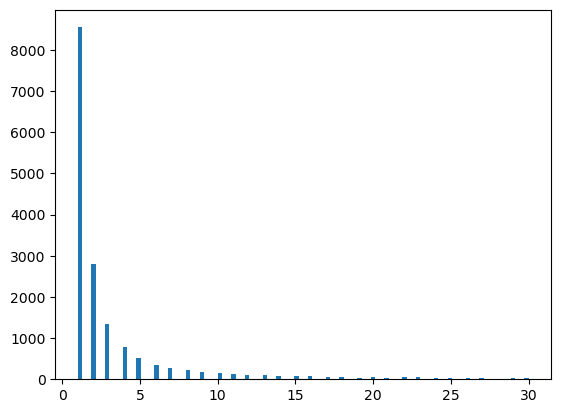

In [138]:
plt.hist(S[1],bins=100,range=[1, 30])


In [140]:
np.mean(S[1])


11.9516157003295

In [141]:
np.median(S[1])

2.0